# Project: Recognizing digits with k-NN

## Introduction:

 * In this project, we will work with MNIST database which contains images of handwritten digits ranges from 0 to 9. The database is also widely used for training and testing in the field of machine learning. The dataset chosen here contains 60,000 samples. 
 
 * Our objective is to take an image and determine which digit it is. Finally, we will explore more some insights and use accuracy score to evaluate the model.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Implement k-NN algorithm

Overview about how **k-NN** algorithm works:
> - Start with set of training data
> - Given a new data point $x$ where we will compute its **distance** from all training data points 
> - Selecting $k$ nearest neighbors of $x$ and check their **labels**
> - The label which **appears most** often is assigned to point $x$

Having `most_appear_label` serves as a helper function, it takes **array labels** as an input and returns the **label** that appear the most

In [2]:
def most_appear_label(label_array):
    dictionary={}                 #initialize empty key-value dictionary
    for label in label_array:     #iterate through every label and update its frequency
        dictionary[label]= dictionary.get(label,0)+1
    count=0
    label=-1
    for key in dictionary:      #iterate through the label:frequency dictionary to return the most frequency label
        if dictionary[key]>count:
            count= dictionary[key]
            label= key
    return label
        

In [3]:
#testing
print("Given labels array :" +"[2,5,1,3,4,5,2,5,2,2,1,1,1,1,3,2,1,3]")
print("--------------------------------------------------------------------")
label_array= np.array([2,5,1,3,4,5,2,5,2,2,1,1,1,1,3,2,1,3])
print ("The most frequency label is: " + str(most_appear_label(label_array)) + "which is correct")

Given labels array :[2,5,1,3,4,5,2,5,2,2,1,1,1,1,3,2,1,3]
--------------------------------------------------------------------
The most frequency label is: 1which is correct


In [4]:
def knn(training_data,training_label,x,n):
    distance_array= np.sqrt(((training_data-x)**2).sum(1))   
    #calculate the distance between new data x and each training data
    top_n_nearest_distance_by_index= distance_array.argsort()[:n]
    #sort top n nearest neighbors(distance) to have an array of index
    top_n_nearest_by_label= training_label[top_n_nearest_distance_by_index]
    #access the corresponding labels from training labels with index
    label= most_appear_label(top_n_nearest_by_label)
    #return the most frequency label with helper function
    return (label,top_n_nearest_distance_by_index)

To test function `knn`, we generate the testing dataset with **100 samples** and **5 labels** using **sklearn library**:

In [5]:
from sklearn.datasets import make_blobs

X, y= make_blobs(
    n_samples=100,
    n_features= 2,
    centers=5,
    cluster_std= 1,
    random_state=1
)

In [6]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize


def plot_clusters(X, y, p=None, p_label=None, neighbors=None):
    """
    Plots nearest neighbors of a given point.

    X:
        A 2-dimensional numpy array with coordinates
        of points in clusters
    y:
        A 1-dimensional numpy array with labels of points
    p:
        An array with coordinates of the point whose
        neighbors will be plotted.
    p_label:
        The predicted label of the point p.
    neighbors:
        A list of row numbers of X which are the nearest
        neighbors of the point p.
    """

    # build a custom colormap
    col_list = ['dodgerblue', 'limegreen', 'red', 'orange', 'fuchsia']
    colors = ListedColormap(col_list)
    norm = Normalize(0, len(col_list))

    plt.figure(figsize=(8, 8))
    with plt.style.context('seaborn'):
        scatter = plt.scatter(X[:, 0],
                              X[:, 1],
                              c=y,
                              s=90,
                              cmap=colors,
                              norm=norm,
                              label=y)
        if p is not None:
            p_col = "k" if p_label is None else colors(norm(p_label))
            plt.plot(p[0], p[1], marker="*", mfc=p_col, mec="k", ms=30, mew=2)
        if neighbors is not None:
            plt.scatter(X[neighbors, 0],
                        X[neighbors, 1],
                        edgecolors='black',
                        linewidth=3,
                        facecolors="None",
                        s=300)
        plt.legend(*scatter.legend_elements(),
                   markerscale=1.5,
                   prop={
                       "size": 12,
                       "weight": "normal"
                   })
    plt.show()

In [7]:
# using knn function to predict the label
testing_point= np.array([-7,-9])
test_result= knn(X,y, testing_point, 10)

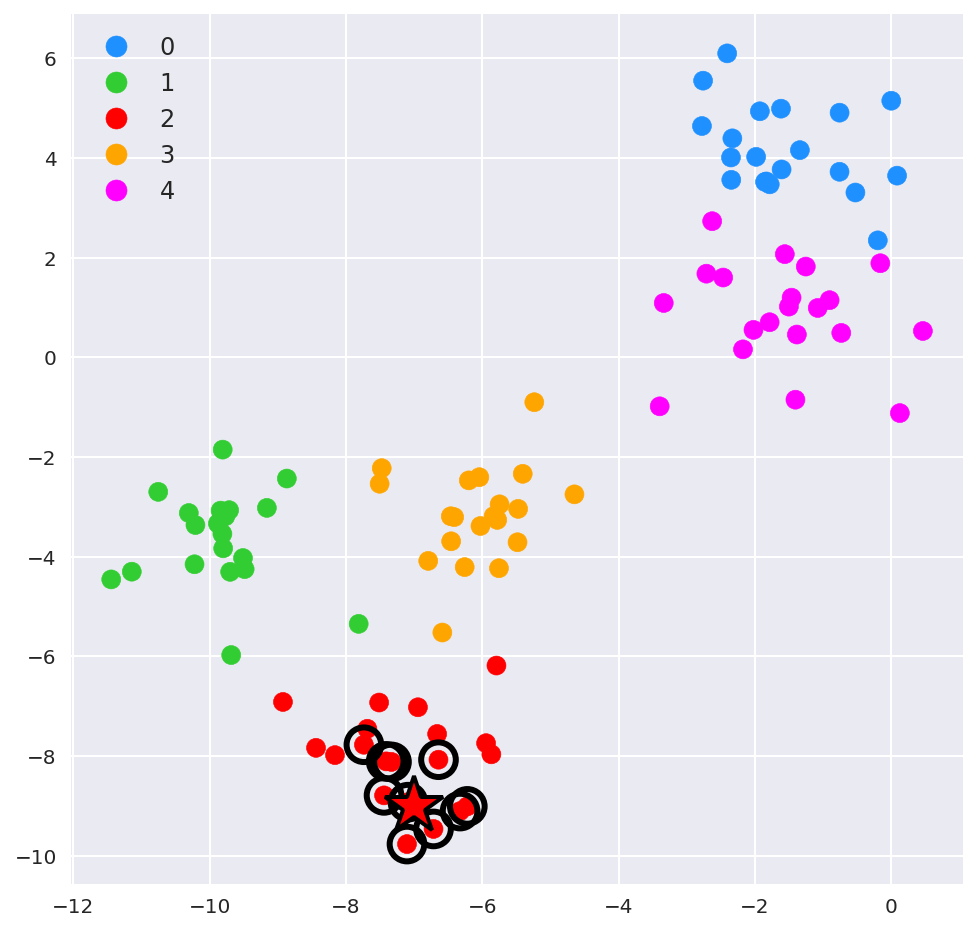

In [8]:
#visualize the result
p= testing_point
p_label=test_result[0]
neighbors= test_result[1]
plot_clusters(X, y, p, p_label, neighbors)


Looking at the graph, the output of our `knn` function is reasonable with all of nearest neighbors

## Further exploration:

In order to work with MNIST database, first, we import and transform the data:

In [9]:
with open("train-images-idx3-ubyte",'rb') as foo:
    f= foo.read()
images= np.array([b for b in f[16:]]).reshape(-1,28*28)
print("Shape of data is:")
print (images.shape)
print("Here, the dataset includes 60000 samples, each is represented by 1D array of size(1,784)")

Shape of data is:
(60000, 784)
Here, the dataset includes 60000 samples, each is represented by 1D array of size(1,784)


In [10]:
print ("Example presentation of a number images: ")
img= images[90].reshape(28,28)
with np.printoptions(linewidth=5*28):
    print (img)

Example presentation of a number images: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  25 214 225  90   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 145 212 253 253  60   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 106 253 253 246 188  23   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  45 164 254 253 223 108   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  24 236 253 252 124  28   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 100 217 253 218 116   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 

In [11]:
with open("train-labels-idx1-ubyte",'rb') as foo:
    f= foo.read()
labels= np.array([b for b in f[8:]])
print ("Corresponding is an array represents the label for 60,000 images:")
print(labels.shape)

Corresponding is an array represents the label for 60,000 images:
(60000,)


We conduct a **permutation** on the dataset to **create the randomness** in our database and prevent the **in-order** number (if applicable):

In [12]:
rng= np.random.default_rng(2)
reorder= rng.permutation(len(images))
reorder

array([58490, 29928, 51871, ..., 29028,   840, 22721])

In [13]:
images= images[reorder]
labels= labels[reorder]

First, we will explore how the knn model behaves with different **training size** and **numbers of neighbor** :

In [14]:
def varies_knn(train_size,test_size=300):
    train_images= images[:train_size]
    train_labels= labels[:train_size]
    #slicing the first train size data to feed the knn model
    test_images= images[train_size:train_size+test_size]
    test_labels= labels[train_size:train_size+test_size]
    #slicing the next test size data to test(here we test around 300 data)
    count=0
    accurate_lst=[]
    for neighbors in range(5,70,10):
        #iterate through list of different numbers of neighbors
        for i in range(len(test_images)):
            #for each numbers of neighbor calculate the accuracy rate
            predict= knn(train_images,train_labels,test_images[i],neighbors)
            if predict[0] == test_labels[i]:
                count+=1
        accurate_lst.append((count/len(test_images))*100)
        count=0
    return accurate_lst      

In [15]:
predict_1=varies_knn(3000,test_size=300)
print ("Feeding the training set of size 3000, we obtain the following list of accuracy rate:" + str(predict_1))

Feeding the training set of size 3000, we obtain the following list of accuracy rate:[91.33333333333333, 90.0, 89.66666666666666, 88.33333333333333, 88.33333333333333, 86.66666666666667, 86.0]


In [16]:
predict_2=varies_knn(5000,test_size=300)
print ("Feeding the training set of size 5000, we obtain the following list of accuracy rate:" + str(predict_2))

Feeding the training set of size 5000, we obtain the following list of accuracy rate:[93.66666666666667, 91.66666666666666, 92.33333333333333, 90.66666666666666, 89.33333333333333, 89.33333333333333, 89.0]


In [17]:
predict_3=varies_knn(7000,test_size=300)
print ("Feeding the training set of size 7000, we obtain the following list of accuracy rate:" + str(predict_3))

Feeding the training set of size 7000, we obtain the following list of accuracy rate:[96.33333333333334, 94.33333333333334, 93.0, 92.33333333333333, 90.66666666666666, 90.0, 89.33333333333333]


Having the same idea as the **original** function `knn`, `knn_alt` function just use different distance calculating method, here is the **Manhattan** instead of the **Eucledian**:

In [18]:
def knn_alt(training_data,training_label,x,n):
    distance_array= np.abs((training_data-x)).sum(1)
    top_n_nearest_distance_by_index= distance_array.argsort()[:n]
    top_n_nearest_by_label= training_label[top_n_nearest_distance_by_index]
    label= most_appear_label(top_n_nearest_by_label)
    return (label,top_n_nearest_distance_by_index)

In [19]:
def varies_knn_alt(train_size,test_size=300):
    train_images= images[:train_size]
    train_labels= labels[:train_size]
    test_images= images[train_size:train_size+test_size]
    test_labels= labels[train_size:train_size+test_size]
    count=0
    accurate_lst=[]
    for neighbors in range(5,70,10):
        for i in range(len(test_images)):
            predict= knn_alt(train_images,train_labels,test_images[i],neighbors)
            if predict[0] == test_labels[i]:
                count+=1
        accurate_lst.append((count/len(test_images))*100)
        count=0
    return accurate_lst     

In [20]:
predict_alt_1=varies_knn_alt(3000,test_size=300)
print ("Feeding the training set of size 3000, we obtain the following list of accuracy rate:" + str(predict_alt_1))

Feeding the training set of size 3000, we obtain the following list of accuracy rate:[90.66666666666666, 88.0, 86.66666666666667, 86.0, 85.0, 84.66666666666667, 83.66666666666667]


In [21]:
predict_alt_2=varies_knn_alt(5000,test_size=300)
print ("Feeding the training set of size 5000, we obtain the following list of accuracy rate:" + str(predict_alt_2))

Feeding the training set of size 5000, we obtain the following list of accuracy rate:[92.0, 91.33333333333333, 89.0, 88.33333333333333, 87.66666666666667, 86.0, 85.33333333333334]


In [22]:
predict_alt_3=varies_knn_alt(7000,test_size=300)
print ("Feeding the training set of size 7000, we obtain the following list of accuracy rate:" + str(predict_alt_3))

Feeding the training set of size 7000, we obtain the following list of accuracy rate:[94.66666666666667, 94.66666666666667, 91.66666666666666, 91.0, 89.66666666666666, 88.66666666666667, 88.66666666666667]


Taking the result of two different function `knn` and `knn_alt`, we plot the accuracy rate to get a better insights:

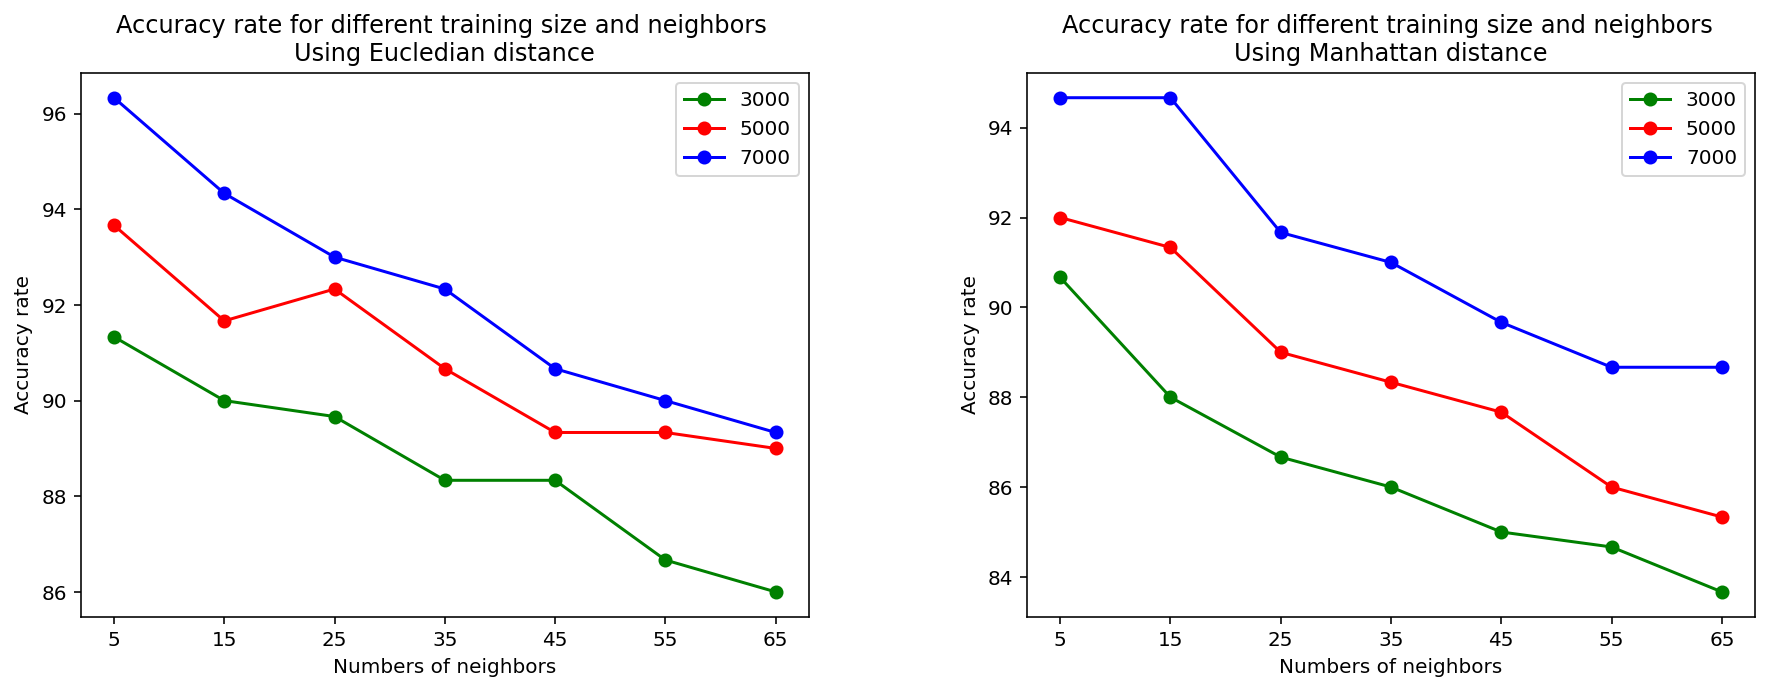

In [23]:
x_axis= range(5,70,10)
plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
plt.plot(x_axis, predict_1, color="green", marker='o',label="3000")
plt.plot(x_axis, predict_2, color="red",marker='o', label='5000')
plt.plot(x_axis, predict_3, color= "blue",marker='o',label='7000')
plt.legend()
plt.xticks(x_axis)
plt.xlabel('Numbers of neighbors')
plt.ylabel('Accuracy rate')
plt.title("""Accuracy rate for different training size and neighbors 
Using Eucledian distance""")

plt.subplot(122)
plt.plot(x_axis, predict_alt_1, color="green", marker='o',label="3000")
plt.plot(x_axis, predict_alt_2, color="red",marker='o', label='5000')
plt.plot(x_axis, predict_alt_3, color= "blue",marker='o',label='7000')
plt.legend()
plt.xticks(x_axis)
plt.xlabel('Numbers of neighbors')
plt.ylabel('Accuracy rate')
plt.title("""Accuracy rate for different training size and neighbors 
Using Manhattan distance""")

plt.show()

The above plot gives us some meaningful insights:

> - Using *Eucledian* distance calculating method yields a **better** accuracy rate compare to *Manhattan* method

> - For both of the method, giving a **higher training dataset** will result in the **better accuracy rate** at the end 

> - However, as the numbers of **neighbor increase**, the **accuracy rate** will be **decreased**. 


> - The training **size of 7000** and **5 neighbors** will be the **best** for the knn model

We prepare the training dataset of size 7000 (the best for the model) in order to analyze more interesting insights about the model:


In [24]:
train_images= images[:7000]
train_labels= labels[:7000]
test_images= images[7000:7000+300]
test_labels= labels[7000:7000+300]

* Here, we will find out how many percent of images will be perfectly classified (all neighbors have the same labels) ?


* Also, how many of images is not classified correctly even all the neighbors have the same labels ?

In [25]:
perfect_classify=[]
outliers=[]
total_correct=0
for i in range(len(test_images)):
    predict= knn(train_images,train_labels,test_images[i],5)
    neighbors= train_labels[predict[1]]
    if (predict[0] == test_labels[i]):
        total_correct+=1
        if (neighbors.tolist().count(predict[0])==5):
            perfect_classify.append(i)
    elif (predict[0] != test_labels[i] and neighbors.tolist().count(neighbors[0]) ==5):
        outliers.append(i)
print ("In " +str(total_correct)+ " out of 300 images that are correctly classified, up to " + str((len(perfect_classify)/total_correct)*100)+"% of them that are perfectly classified")

In 289 out of 300 images that are correctly classified, up to 82.35294117647058% of them that are perfectly classified


In [26]:
print ("On the other hand, there are " + str(len(outliers))+ " images that are not classified correctly even all the neighbors have the same labels")
print (outliers)

On the other hand, there are 2 images that are not classified correctly even all the neighbors have the same labels
[101, 238]


In the next step, we will have a **10X10 matrix** where it compares the **actual** label values and the **predicted** value of the model. Thanks to it, we will understand better which numbers are most difficult to recognize and being confused most with which numbers:

In [27]:
# initialize an array of zeros
confusion_matrix= np.zeros((10,10))
#iterate through every test data, update the corresponding column for actual and predicted label
#for example, update row 1 column 2 if actual label is 2 but predicted is 1
for i in range(len(test_images)):
    predict= knn(train_images,train_labels,test_images[i],5)
    confusion_matrix[test_labels[i],predict[0]]+=1
confusion_matrix

array([[29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 33.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 40.,  0.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0., 24.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 23.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 36.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 23.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  3.,  0.,  0., 23.,  2.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0., 27.]])

A visualization will represent the better information and make the result easier to be interpreted

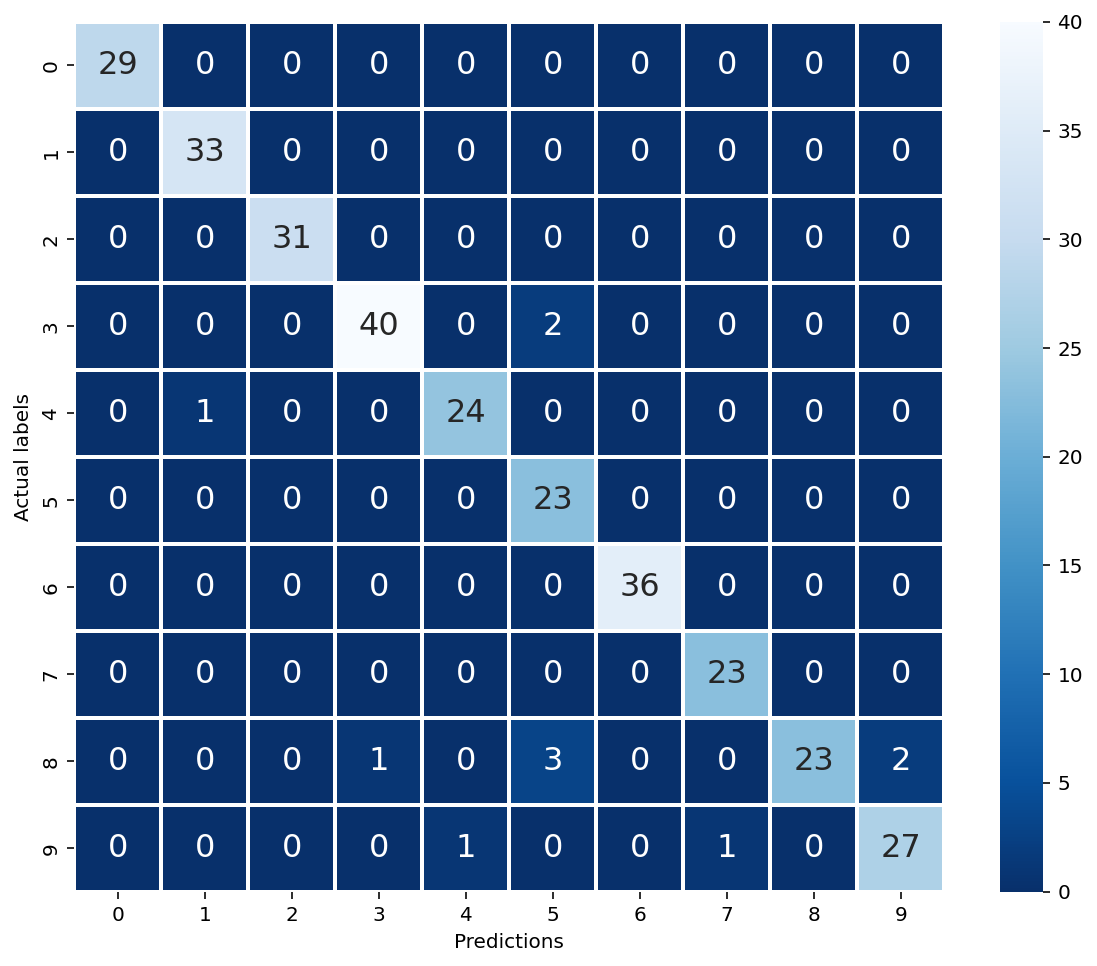

In [28]:
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.heatmap(confusion_matrix, 
            annot=True,
            annot_kws = {"fontsize": 16},
            cbar=True,
            linewidth=2,
            square=True,
            cmap="Blues_r"
            
)
plt.xlabel("Predictions")
plt.ylabel("Actual labels")
plt.show()

Here we go !!!!!

> - In general, the diagonal shows that **most of predicted label match with the actual***

> - The most **confused** number is **8** which is incorrectly classified:  **three times** as number **5** and **twice** as number **9**

> - This makes sense because **5-8-9** really looks alike when writing too fast.

## Conclusion:

In conclusion:

> - k-NN algorithm works really well for the MNIST database.

> - Overall, using **Eucledian** distance yields better accuracy rate than using **Manhattan** distance (numbers of neighbors are equal).

> - For both of the method, giving a **higher training dataset** will result in the **better accuracy rate** at the end.

> - However, as the numbers of **neighbor increase**, the **accuracy rate** will be **decreased**. 

> - Using **7000 training** images and **300 testing** images, we achieve **96.3% accuracy** which means around **289 images** are correctly classified.

> - In those 289 images, **82.4%** of them that are **perfectly** classified ( all the neighbors have same label).

> - There are **2 outliers** which are incorrectly classified despite all the neighbors have same label.

> - From 0-9, number **8** is the most confused and it is mainly misclassified as number **5** and **9** instead.
